In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, PrecisionRecallDisplay
from sklearn.model_selection import learning_curve


from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from collections import Counter


from sklearn.preprocessing import LabelEncoder

In [27]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)
df.head()

,tweet,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,...,Hash_words_ad,clean_tweet,clean_anonymized_description,tweet_len,word_count,tokenized_text,pos_tags,lemmatized_text,stemmed_text,swear_word_bin
0,@unknown Con tutte le denunce che si sta becca...,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,...,No hashtags,Con tutte le denunce che si sta beccando Salvi...,Avete presente quegli stereotipi sui siciliani...,120,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...","[('denunce', 'NOUN'), ('beccando', 'VERB'), ('...","['denuncia', 'beccare', 'Salvini', 'rischiare'...","['denunc', 'becc', 'salvin', 'risc', 'aument',...",0
1,#PRESCRIZIONE : I (t)re magi hanno trovato l’a...,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,...,No hashtags,PRESCRIZIONE I tre magi hanno trovato laccord...,Prof di latino e Deputata PDAma lo sport la Ro...,255,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...","[('PRESCRIZIONE', 'VERB'), ('tre', 'NUM'), ('m...","['PRESCRIZIONE', 'tre', 'mago', 'trovare', 'la...","['prescrizion', 'tre', 'mag', 'trov', 'laccord...",0
2,Il #m5s ha votato contro le #unionicivili addu...,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,...,No hashtags,Il m5s ha votato contro le unionicivili adduce...,Medico appassionato di Cinema dAutore Musica e...,255,40,"['m5s', 'votato', 'unionicivili', 'adducendo',...","[('m5s', 'NOUN'), ('votato', 'VERB'), ('unioni...","['m5s', 'votare', 'unionicivile', 'adducere', ...","['m5s', 'vot', 'unionicivil', 'adduc', 'scus',...",1
3,La #Lega e il #m5s stanno dando a bere all'opi...,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,...,No hashtags,La Lega e il m5s stanno dando a bere allopinio...,nodescription,246,38,"['Lega', 'm5s', 'dando', 'bere', 'allopinione'...","[('Lega', 'VERB'), ('m5s', 'PROPN'), ('dando',...","['lega', 'm5s', 'dare', 'bere', 'allopinione',...","['leg', 'm5s', 'dand', 'ber', 'allopinion', 'p...",0
4,Che cosa cambia questa #legge? Caro @667517147...,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,...,No hashtags,Che cosa cambia questa legge Caro con il decr...,Veneto Assessore Regionale Sviluppo Economico ...,195,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...","[('cambia', 'VERB'), ('legge', 'NOUN'), ('Caro...","['cambiare', 'legge', 'Caro', 'decretoinsicure...","['camb', 'legg', 'car', 'decretoinsicurezz', '...",0


# Model WITHOUT metadata


In [28]:
X = df['clean_tweet'].values
y = df['is_hate_speech'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=0)


In [29]:
# TFvectorizer 

TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,3),
                               max_df=.75,
                               min_df = 2,                               )

X_train_tfid = TFvectorizer.fit_transform(X_train)
X_test_tfid = TFvectorizer.transform(X_test)

In [16]:

Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,3),   # hyperparameter
                                 max_df=.8,
                                 min_df =5)

X_train_cnt = Cntvectorizer.fit_transform(X_train)
X_test_cnt = Cntvectorizer.transform(X_test)

#Looking at the distribution of labels in the target variable, as well as info on the X_train matrix
print(np.unique(y_train, return_counts=True))

(array([0, 1], dtype=int64), array([4655, 2290], dtype=int64))


### Pipeline CountVectorizer

In [31]:

# List of text representations
text_representations = ['tokenized_text', 'lemmatized_text']


# Dictionary to store final best results
final_results_dict_count = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

    # Define a pipeline with CountVectorizer and RandomForestClassifier
    count_vectorizer = CountVectorizer()
    rf_classifier = RandomForestClassifier(n_jobs=5, random_state =42)

    count_pipe = Pipeline([
        ('vect', count_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', rf_classifier),
    ])

    # Define parameter distributions for RandomizedSearchCV
    param_dist_count = {
        'sel__k':[50,100,200,500,1000,'all'],
        'vect__ngram_range': [(1,1),(1, 2),(1, 3)],
        'vect__max_df': [0.75, 0.8, 0.85,0.9],
        'vect__min_df': [2,5,7,10],
        'clf__n_estimators': [100, 250, 500],
        'clf__max_samples':[0.2,0.3,0.4],
        'clf__min_samples_leaf':[2,3],
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_features': ['sqrt', 'log2'],
    }

    # Create RandomizedSearchCV
    random_search_count = RandomizedSearchCV(
        count_pipe, param_distributions=param_dist_count, scoring='f1_macro',
        n_iter=75, cv=5, n_jobs=15, random_state=42
    )

    # Perform RandomizedSearchCV
    random_search_count.fit(X_train, y_train)

    # Store final best results
    final_results_dict_count[text_representation] = {
        'best_parameters': random_search_count.best_params_,
        'best_f1_score': random_search_count.best_score_,
    }


    # Print best parameters and accuracy
    print(f"Best Parameters for CountVectorizer ({text_representation} - RandomForest - RandomizedSearchCV):")
    print(random_search_count.best_params_)
    print("Best f1-score:", random_search_count.best_score_)

    print("                                                                                                                                 ")
    print("                                                                                                                                 ")

    # Evaluate the best model on the test set
    y_pred_count = random_search_count.best_estimator_.predict(X_test)

    accuracy_count = accuracy_score(y_test, y_pred_count)
    f1_scores_count = f1_score(y_test, y_pred_count, average='macro')
    classification_rep_count = classification_report(y_test, y_pred_count)

    print(f'Accuracy (CountVectorizer - {text_representation} - RandomForest):', accuracy_count)
    print(f'F1-score_macro (CountVectorizer - {text_representation} - RandomForest):', f1_scores_count)
    print(f'Classification Report (CountVectorizer - {text_representation} - RandomForest):')
    print(classification_rep_count)

    
    print("                                                                                                                                 ")
    print("                                                                                                                                 ")

# Convert the dictionary to JSON format
final_results_json_count = json.dumps(final_results_dict_count, indent=2)

# Save the JSON to a file
with open('final_results_count_RF.json', 'w') as file:
    file.write(final_results_json_count)




Best Parameters for CountVectorizer (tokenized_text - RandomForest - RandomizedSearchCV):
{'vect__ngram_range': (1, 3), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 500, 'clf__n_estimators': 250, 'clf__min_samples_leaf': 2, 'clf__max_samples': 0.4, 'clf__max_features': 'sqrt', 'clf__criterion': 'gini'}
Best f1-score: 0.7880358802711485
                                                                                                                                 
                                                                                                                                 
Accuracy (CountVectorizer - tokenized_text - RandomForest): 0.8259993281827342
F1-score_macro (CountVectorizer - tokenized_text - RandomForest): 0.776862414844912
Classification Report (CountVectorizer - tokenized_text - RandomForest):
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1996
           1       0.89      0.54      0.67       9

### TFIDFVectorizer Pipeline

In [14]:
# List of text representations
text_representations = ['tokenized_text', 'lemmatized_text']


# Dictionary to store final best results
final_results_dict_tfidf = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

    # Pipeline with CountVectorizer and RandomForestClassifier

    tfidf_vectorizer = TfidfVectorizer()
    rf_classifier = RandomForestClassifier(n_jobs=5, random_state = 42)
    
    tfidf_pipe = Pipeline([
        ('vect', tfidf_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', rf_classifier),
    ])

    # Define parameter distributions for RandomizedSearchCV
    param_dist_tfidf = {
    'sel__k':[50,100,200,500,1000,'all'],
    'vect__ngram_range': [(1,1),(1, 2),(1, 3)],
    'vect__max_df': [0.75, 0.8, 0.85,0.9],
    'vect__min_df': [2,5,7,10],
    'clf__n_estimators': [100, 250, 500],
    'clf__max_samples':[0.2,0.3,0.4],
    'clf__min_samples_leaf':[2,3],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_features': ['sqrt', 'log2'],
}

    # Create RandomizedSearchCV
    random_search_tfidf = RandomizedSearchCV(
        tfidf_pipe, param_distributions=param_dist_tfidf, scoring='f1_macro',
        n_iter=75, cv=5, n_jobs=15, random_state=42
    )

    # Perform RandomizedSearchCV
    random_search_tfidf.fit(X_train, y_train)

    # Store final best results
    final_results_dict_tfidf[text_representation] = {
        'best_parameters': random_search_tfidf.best_params_,
        'best_f1_score': random_search_tfidf.best_score_,
    }


    # Print best parameters and accuracy
    print(f"Best Parameters for TfidfVectorizer ({text_representation} - RandomForest - RandomizedSearchCV):")
    print(random_search_tfidf.best_params_)
    print("Best f1-score:", random_search_tfidf.best_score_)

    # Evaluate the best model on the test set
    y_pred_count = random_search_tfidf.best_estimator_.predict(X_test)

    accuracy_count = accuracy_score(y_test, y_pred_count)
    f1_scores_count = f1_score(y_test, y_pred_count, average='macro')
    classification_rep_count = classification_report(y_test, y_pred_count)

    print(f'Accuracy (Tfidfvectorizer - {text_representation} - RandomForest):', accuracy_count)
    print(f'F1-score_macro (Tfidfvectorizer  - {text_representation} - RandomForest):', f1_scores_count)
    print(f'Classification Report (Tfidfvectorizer  - {text_representation} - RandomForest):')
    print(classification_rep_count)

# Convert the dictionary to JSON format
final_results_json_tfidf = json.dumps(final_results_dict_tfidf, indent=2)

# Save the JSON to a file
with open('final_results_Tfidf_RF.json', 'w') as file:
    file.write(final_results_json_tfidf)


Best Parameters for TfidfVectorizer (tokenized_text - RandomForest - RandomizedSearchCV):
{'vect__ngram_range': (1, 3), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 500, 'clf__n_estimators': 250, 'clf__min_samples_leaf': 2, 'clf__max_samples': 0.4, 'clf__max_features': 'sqrt', 'clf__criterion': 'gini'}
Best f1-score: 0.7848259116856782
Accuracy (Tfidfvectorizer - tokenized_text - RandomForest): 0.8223043332213638
F1-score_macro (Tfidfvectorizer  - tokenized_text - RandomForest): 0.7736700483707617
Classification Report (Tfidfvectorizer  - tokenized_text - RandomForest):
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1996
           1       0.87      0.54      0.67       981

    accuracy                           0.82      2977
   macro avg       0.84      0.75      0.77      2977
weighted avg       0.83      0.82      0.81      2977

Best Parameters for TfidfVectorizer (lemmatized_text - RandomForest - RandomizedSearchCV):

### Check Learning Curve

- {'vect__ngram_range': (1, 3), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 500, 'clf__n_estimators': 250, 'clf__min_samples_leaf': 2, 'clf__max_samples': 0.4, 'clf__max_features': 'sqrt', 'clf__criterion': 'gini'}


In [ ]:





# Define the pipeline with CountVectorizer and RandomForestClassifier
count_vectorizer = CountVectorizer(ngram_range=(1, 3), min_df=2, max_df=0.75)

rf_classifier = RandomForestClassifier(n_estimators=250, max_samples=0.4, max_features='sqrt', criterion='gini', n_jobs = -1, min_samples_leaf=3)

pipeline = Pipeline([
    ('vect', count_vectorizer),
    ('sel', SelectKBest(chi2, k=500)),  # Close the parenthesis for SelectKBest
    ('clf', rf_classifier)
])

# Create a learning curve with the pipeline
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Add labels and title
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - RandomForestClassifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()

### Balancing - TfidfVectorizer

- {'vect__ngram_range': (1, 3), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 500, 'clf__n_estimators': 250, 'clf__min_samples_leaf': 2,\'clf__max_samples': 0.4, 'clf__max_features': 'sqrt', 'clf__criterion': 'gini'}

In [33]:
#

X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)


# TfidfVectorizer
TFvectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    max_df=0.75,
    min_df=2
)

X_train_tfid = TFvectorizer.fit_transform(X_train)
X_test_tfid = TFvectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=500)

X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_tfid_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

# Tomek Links
clf_tomek = RandomForestClassifier(
    n_estimators=250,
    max_samples=0.4,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42
)

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_tfid_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_tfid_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

# RandomForest with SMOTE
clf_smote = RandomForestClassifier(
    n_estimators=250,
    max_samples=0.4,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42)

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_tfid_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_tfid_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))

# RandomForest with ADASYN
clf_adasyn = RandomForestClassifier(
    n_estimators=250,
    max_samples=0.4,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42)

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_tfid_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn)

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4415, 1: 2290})
Tomek Links:
Accuracy: 0.8303661404098085
F1-score_macro: 0.7854601187159158
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1996
           1       0.88      0.57      0.69       981

    accuracy                           0.83      2977
   macro avg       0.85      0.76      0.79      2977
weighted avg       0.84      0.83      0.82      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.826671145448438
F1-score_macro: 0.7887725771161354
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1996
           1       0.82      0.61      0.70       981

    accuracy                           0.83      2977
   macro avg       0.82      0.77      0.79      2977
weighted avg       0.83      0.83      0.82      2977

ADASYN Resampled dataset shape Counte

### Balancing CountVectorizer
- {'vect__ngram_range': (1, 3), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 500, 'clf__n_estimators': 250, 'clf__min_samples_leaf': 2,\'clf__max_samples': 0.4, 'clf__max_features': 'sqrt', 'clf__criterion': 'gini'}


In [34]:
X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

# CountVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1, 3),
    max_df=0.75,
    min_df=2
)

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest(chi2, k=500)
X_train_count_selected = k_best.fit_transform(X_train_count, y_train)
X_test_count_selected = k_best.transform(X_test_count)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_count_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

clf_tomek = RandomForestClassifier(
    n_estimators=250,
    max_samples=0.4,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42
)

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_count_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state = 42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_count_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

# RandomForest with SMOTE
clf_smote = RandomForestClassifier(
    n_estimators=250,
    max_samples=0.4,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42
)

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_count_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_count_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))

# RandomForest with ADASYN
clf_adasyn = RandomForestClassifier(
    n_estimators=250,
    max_samples=0.4,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42
)

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_count_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn)

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4651, 1: 2290})
Tomek Links:
Accuracy: 0.8347329526368827
F1-score_macro: 0.7880623708565575
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1996
           1       0.91      0.55      0.69       981

    accuracy                           0.83      2977
   macro avg       0.86      0.76      0.79      2977
weighted avg       0.85      0.83      0.82      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.7332885455156197
F1-score_macro: 0.7181935971829589
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1996
           1       0.57      0.76      0.65       981

    accuracy                           0.73      2977
   macro avg       0.72      0.74      0.72      2977
weighted avg       0.76      0.73      0.74      2977

ADASYN Resampled dataset shape Count

# Confusion Matrix and PR for the Best performing model 
- {'vect__ngram_range': (1, 3), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 500, 'clf__n_estimators': 250, 'clf__min_samples_leaf': 2,'clf__max_samples': 0.4, 'clf__max_features': 'sqrt', 'clf__criterion': 'gini'}
- TomekLinks TFidf

Tomek Resampled dataset shape Counter({0: 4651, 1: 2290})
Tomek Links:
Accuracy: 0.8347329526368827
F1-score_macro: 0.7880623708565575
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1996
           1       0.91      0.55      0.69       981

    accuracy                           0.83      2977
   macro avg       0.86      0.76      0.79      2977
weighted avg       0.85      0.83      0.82      2977



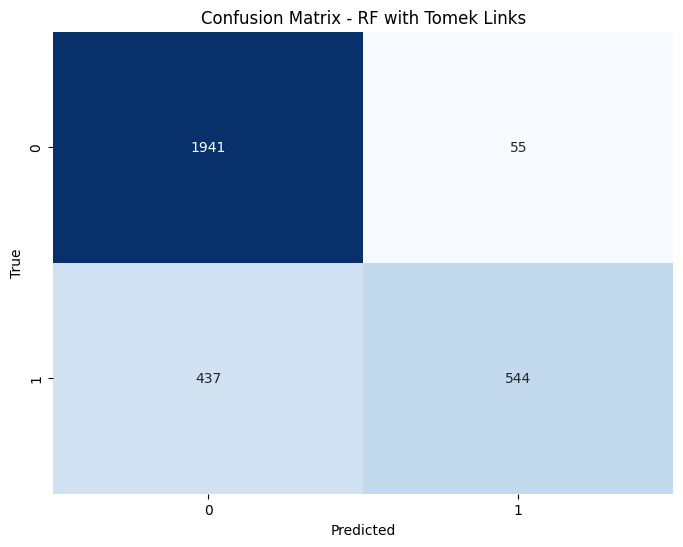

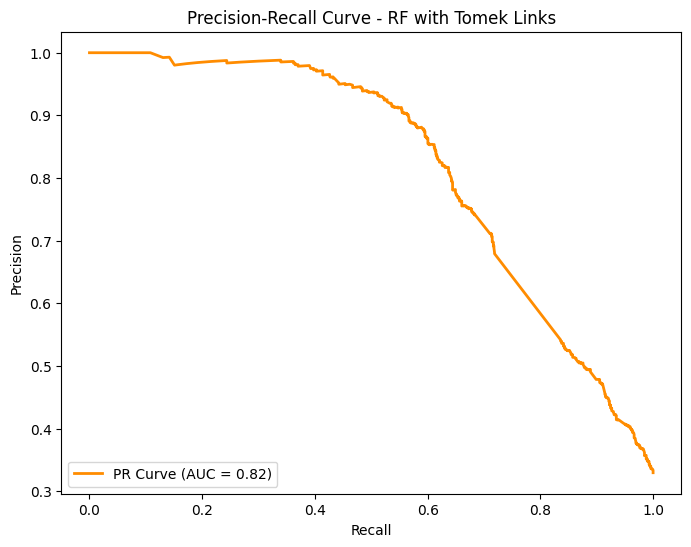

Precision-Recall Metrics:
AUC Score: 0.8184383590272708


In [24]:
X = df['tokenized_text'].values
y = df['is_hate_speech'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)


# CountVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1, 3),
    max_df=0.75,
    min_df=2
)

X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=500)

X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)


# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_tfid_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

# RF with Tomek Links
clf_tomek = RandomForestClassifier(
    n_estimators=250,
    max_samples=0.4,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42
)

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_tfid_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

cm = confusion_matrix(y_test, y_pred_tomek)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - RF with Tomek Links')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, clf_tomek.predict_proba(X_test_tfid_selected)[:, 1])

# Calculate area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - RF with Tomek Links')
plt.legend(loc='lower left')
plt.show()

# Display precision-recall metrics
print("Precision-Recall Metrics:")
print("AUC Score:", auc_score)


# Model WITH metadata

In [11]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)
df = df.drop(['Hash_words_ad','Hash_words_tweet','anonymized_description','tweet','Weighted_Engagement','clean_anonymized_description', 'clean_tweet', 'lemmatized_text', 'stemmed_text', 'pos_tags'], axis = 1 )
df.head()


,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,device,tweet_len,word_count,tokenized_text,swear_word_bin
0,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,5,120,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...",0
1,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,5,255,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...",0
2,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,5,255,40,"['m5s', 'votato', 'unionicivili', 'adducendo',...",1
3,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,3,246,38,"['Lega', 'm5s', 'dando', 'bere', 'allopinione'...",0
4,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,4,195,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...",0


In [12]:
X_tweet = df['tokenized_text'].values
y = df['is_hate_speech'].values


In [13]:
Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,3),   # hyperparameter
                                 max_df=.75,
                                 min_df = 2)

X_tweet_cnt = Cntvectorizer.fit_transform(X_tweet)


In [14]:
#try Tfid vectorizer same approach 


TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,3),
                               max_df=.75,
                               min_df = 2
                               )

X_tweet_tfid = TFvectorizer.fit_transform(X_tweet)


In [15]:
df_meta = pd.read_csv("dataset_final.csv", skipinitialspace= True)
df_meta = df.drop(['is_hate_speech', 'tokenized_text', 'tweet_len'], axis = 1 )


df_meta = df_meta.values

In [16]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

from scipy.sparse import hstack

merged_sparse_cnt = hstack([X_tweet_cnt, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_cnt.shape)



(9922, 20082)


In [17]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

from scipy.sparse import hstack

merged_sparse_tfid = hstack([X_tweet_tfid, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_tfid.shape)


(9922, 20082)


In [18]:
#Split to train and test set for both vectorizers

X_train_meta_cnt, X_test_meta_cnt, y_train, y_test = train_test_split(merged_sparse_cnt, y, stratify = y, test_size=0.3, random_state=0)
X_train_meta_tfid, X_test_meta_tfid, y_train, y_test = train_test_split(merged_sparse_tfid, y, stratify = y, test_size=0.3, random_state=0)



In [19]:
print(X_train_meta_tfid.shape)
print(X_train_meta_cnt.shape)

(6945, 20082)
(6945, 20082)


In [20]:
clf = RandomForestClassifier(
    n_estimators=250,
    max_samples=0.4,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42
)

clf.fit(X_train_meta_cnt, y_train)

y_pred = clf.predict(X_test_meta_cnt)


accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8071884447430299
F1-score_macro: 0.737856842177607
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1996
           1       0.94      0.44      0.60       981

    accuracy                           0.81      2977
   macro avg       0.86      0.71      0.74      2977
weighted avg       0.83      0.81      0.78      2977



In [21]:
clf = RandomForestClassifier(
    n_estimators=500,
    max_samples=0.4,
    max_features='sqrt',
    criterion='entropy',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42
)

clf.fit(X_train_meta_tfid, y_train)

y_pred = clf.predict(X_test_meta_tfid)


accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8115552569701041
F1-score_macro: 0.7905579773753522
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1996
           1       0.93      0.46      0.62       981

    accuracy                           0.81      2977
   macro avg       0.86      0.72      0.75      2977
weighted avg       0.83      0.81      0.79      2977



In [23]:
# Feature selection with SelectKBest
k_best = SelectKBest(chi2, k=500)

X_train_selected = k_best.fit_transform(X_train_meta_tfid, y_train)
X_test_selected = k_best.transform(X_test_meta_tfid)

# RF Classifier
clf = RandomForestClassifier(
    n_estimators=500,
    max_samples=0.4,
    max_features='sqrt',
    criterion='entropy',
    n_jobs=-1,
    min_samples_leaf=2,
    random_state =42
)

clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits=3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.8139066174000672
F1-score_macro: 0.7522633786890308
Classification Report:
              precision    recall  f1-score   support

           0      0.792     0.979     0.876      1996
           1      0.918     0.478     0.629       981

    accuracy                          0.814      2977
   macro avg      0.855     0.729     0.752      2977
weighted avg      0.834     0.814     0.794      2977

